##Análise da População e da População Economicamente Ativa no Brasil (1991–2022)
O presente notebook exemplifica um estudo do uso de ferramentas de ciência de dados no tratamento de microdados públicos, prática essencial para instituições de pesquisa e formulação de políticas públicas no Brasil.

Autora: Aimê Tatagiba

Fonte dos dados: IBGE


In [1]:
# Etapa 1: Instalação do pacote 'basedosdados'
# Este pacote permite acessar bases públicas brasileiras diretamente do BigQuery (Google Cloud).
install.packages("basedosdados")

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

also installing the dependencies ‘clock’, ‘nanoparquet’, ‘rapidjsonr’, ‘dotenv’, ‘bigrquery’, ‘writexl’




In [ ]:
# Etapa 2: Carregando o pacote 'basedosdados' na sessão do R
# A partir daqui, posso usar funções como 'set_billing_id' e 'read_sql' para consultar os dados online.
library("basedosdados")

In [ ]:
# Etapa 3: Conectando o R ao BigQuery (Google Cloud)
# Este comando autentica meu projeto no BigQuery e permite a execução de consultas SQL diretamente pelo R.
# O ID do projeto 'aprendendo-r-477810' é o identificador da minha conta de uso gratuito no Google Cloud.
set_billing_id("aprendendo-r-477810")

# Etapa 4: Escrevendo a consulta SQL
# A consulta seleciona três variáveis principais da base do IBGE:
#  - ano: identifica o período de referência;
#  - populacao: total estimado da população brasileira;
#  - populacao_economicamente_ativa: População economicamente ativa (PEA), considerando pessoas de 14 anos até 65 anos de idade (Mil pessoas), por condição em relação à força de trabalho
query <- "
SELECT
    dados.ano as ano,
    dados.populacao as populacao,
    dados.populacao_economicamente_ativa as populacao_economicamente_ativa
FROM `basedosdados.br_ibge_populacao.brasil` AS dados
"
# Etapa 5: Executando a consulta
# O comando 'read_sql' envia a consulta SQL para o BigQuery e traz o resultado diretamente como um dataframe em R.
# Aqui o dataframe é chamado de 'felicidade', contendo os dados de população por ano.
felicidade <-
read_sql(query, billing_project_id = get_billing_id())

Project keys set successfully
Auto-refreshing stale OAuth token.



In [ ]:
# Criando uma cópia da versão original
felicidade_original <- felicidade

# Agora faço a correção na cópia principal
felicidade$populacao_economicamente_ativa <- felicidade$populacao_economicamente_ativa * 1000



In [ ]:
# Etapa 6: Visualizando o resultado
# Abro o dataframe 'felicidade' para conferir se os dados foram carregados corretamente.
# Cada linha representa um ano, com o total de habitantes e a população economicamente ativa.
View(felicidade)

ano,populacao,populacao_economicamente_ativa
<int64>,<int64>,<int64>
1991,146815815,NA
1992,149236984,NA
1993,151571727,NA
1994,153725670,NA
1995,155822440,NA
1996,157070163,NA
1997,159636413,NA
1998,161790311,NA
1999,163947554,NA


In [ ]:
# Instalando e carregando o pacote de visualização ggplot2 (caso ainda não esteja ativo)
if (!require(ggplot2)) install.packages("ggplot2")
library(ggplot2)


Don't know how to automatically pick scale for object of type <integer64>.
Defaulting to continuous.
Warning message:
“Removed 21 rows containing missing values or values outside the scale range
(`geom_line()`).”


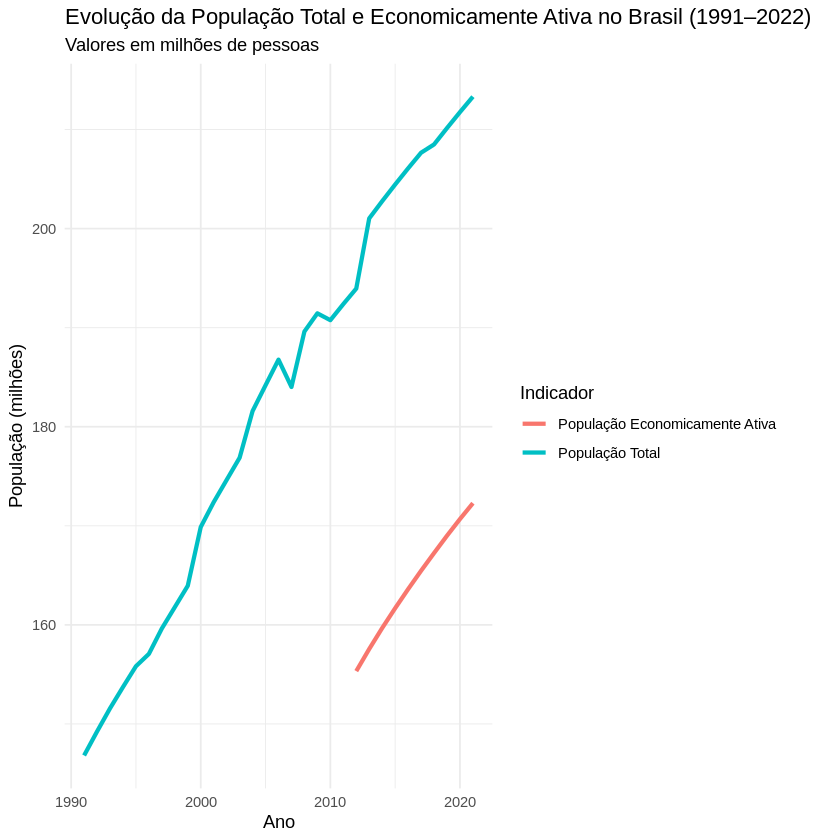

In [ ]:
# Gráfico 1 – Evolução da População Total e Economicamente Ativa (1991–2022)

ggplot(felicidade, aes(x = ano)) +
  geom_line(aes(y = populacao / 1e6, color = "População Total"), size = 1.2) +
  geom_line(aes(y = populacao_economicamente_ativa / 1e6, color = "População Economicamente Ativa"), size = 1.2) +
  labs(
    title = "Evolução da População Total e Economicamente Ativa no Brasil (1991–2022)",
    subtitle = "Valores em milhões de pessoas",
    x = "Ano",
    y = "População (milhões)",
    color = "Indicador"
  ) +
  theme_minimal()


In [ ]:
# Criando variável derivada: taxa de participação da PEA na população total (%)
felicidade$taxa_pea <- (felicidade$populacao_economicamente_ativa / felicidade$populacao) * 100

# Conferindo as primeiras linhas
head(felicidade)


ano,populacao,populacao_economicamente_ativa,taxa_pea
<int64>,<int64>,<int64>,<dbl>
1991,146815815,NA,NA
1992,149236984,NA,NA
1993,151571727,NA,NA
1994,153725670,NA,NA
1995,155822440,NA,NA
1996,157070163,NA,NA


Don't know how to automatically pick scale for object of type <integer64>.
Defaulting to continuous.
Warning message:
“Removed 21 rows containing missing values or values outside the scale range
(`geom_line()`).”


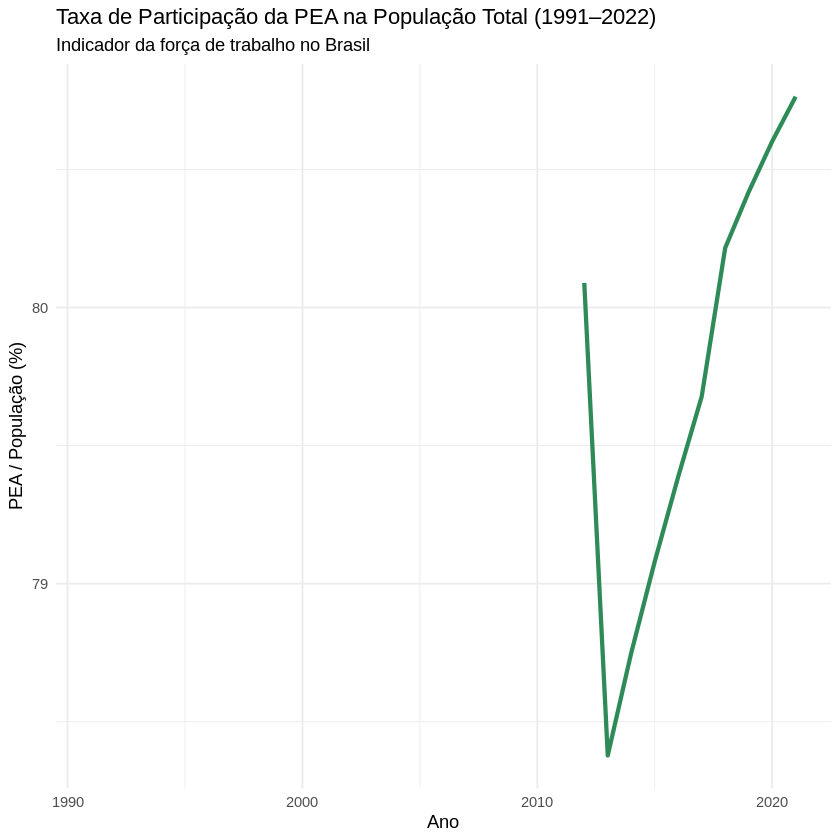

In [ ]:
# Gráfico 2 – Taxa de Participação da PEA na População Total (%)

ggplot(felicidade, aes(x = ano, y = taxa_pea)) +
  geom_line(color = "#2E8B57", size = 1.2) +
  labs(
    title = "Taxa de Participação da PEA na População Total (1991–2022)",
    subtitle = "Indicador da força de trabalho no Brasil",
    x = "Ano",
    y = "PEA / População (%)"
  ) +
  theme_minimal()


In [ ]:
#Aqui abro a base completa 'felicidade' para conferir se todas as colunas e anos foram importados corretamente.
# Essa verificação garante que as variáveis estão no formato esperado antes de iniciar análises e gráficos.
View(felicidade)

ano,populacao,populacao_economicamente_ativa,taxa_pea
<int64>,<int64>,<int64>,<dbl>
1991,146815815,NA,NA
1992,149236984,NA,NA
1993,151571727,NA,NA
1994,153725670,NA,NA
1995,155822440,NA,NA
1996,157070163,NA,NA
1997,159636413,NA,NA
1998,161790311,NA,NA
1999,163947554,NA,NA


## Reflexão analítica
Entre 1991 e 2022, observa-se um crescimento consistente da população brasileira, com ritmo mais acelerado nas décadas de 1990 e 2000 e tendência de estabilização nos anos mais recentes, um resultado direto da transição demográfica em curso.

A População Economicamente Ativa (PEA) também cresce, mas em ritmo menor, refletindo o envelhecimento da estrutura etária, a queda da fecundidade e a ampliação da expectativa de vida. Isso pode indicar que o país está entrando em uma fase de redução relativa da força de trabalho, o que afeta diretamente a produtividade e a sustentabilidade fiscal no médio prazo.

A taxa de participação da PEA, que se manteve em torno de 79–80%, sugere que o Brasil atingiu um patamar de maturidade demográfica, no qual as políticas de emprego e qualificação profissional passam a ter papel decisivo para evitar a estagnação do crescimento.
